# HR Analytics Project

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

#### Reading Data

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
## storing obj and int column in variable
int_col = df.select_dtypes("int").columns.tolist()
print(int_col,"\n")
print("number of int column:",len(int_col))

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'] 

number of int column: 26


In [7]:
obj_col = df.select_dtypes("O").columns.tolist()
print(obj_col,"\n")
print("number of object column:",len(obj_col))

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'] 

number of object column: 9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
## checking null value in %

(df.isna().sum()/len(df))*100

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

* **Dataset have 26 numerical columns and 9 string columns**
* **No null value in dataset**

In [10]:
## Checking unique values
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [11]:
## Droping duplicate
df.drop_duplicates(inplace=True)
df.shape

(1470, 35)

In [12]:
## removing whitespace from dataset
for i in df:
    df[i].astype(str).str.replace(" ","")

#### Exploratory data analysis

In [13]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


* Most of employee are in company have age 35-36.
* Most of employee are charge aroud 65-66 hourly.
* Most of employee working here past 10 years.

In [14]:
for i in obj_col:
    print(i,":",df[i].unique())

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
Over18 : ['Y']
OverTime : ['Yes' 'No']


In [15]:
df["EmployeeCount"].unique()

array([1], dtype=int64)

* Here we can see that **Over18 has only 1 unique value** that means all employee are above 18. That's why we can **drop** this column
* In data set EmployeeNumber is not use full to predict that's why we drop it too.
* from above EmployeeCount,StandardHours has only one value thanwe can drop it also

In [16]:
df.drop(["Over18","EmployeeNumber","EmployeeCount","StandardHours"],axis=1,inplace=True)

In [17]:
df.shape

(1470, 31)

* converting all object value in numerical by using Lebal encoding

In [18]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [19]:
col = df.select_dtypes("O").columns.tolist()
lbe = LabelEncoder()

for i in col:
    lbe.fit(df[i])
    df[i] = lbe.transform(df[i])

In [20]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0


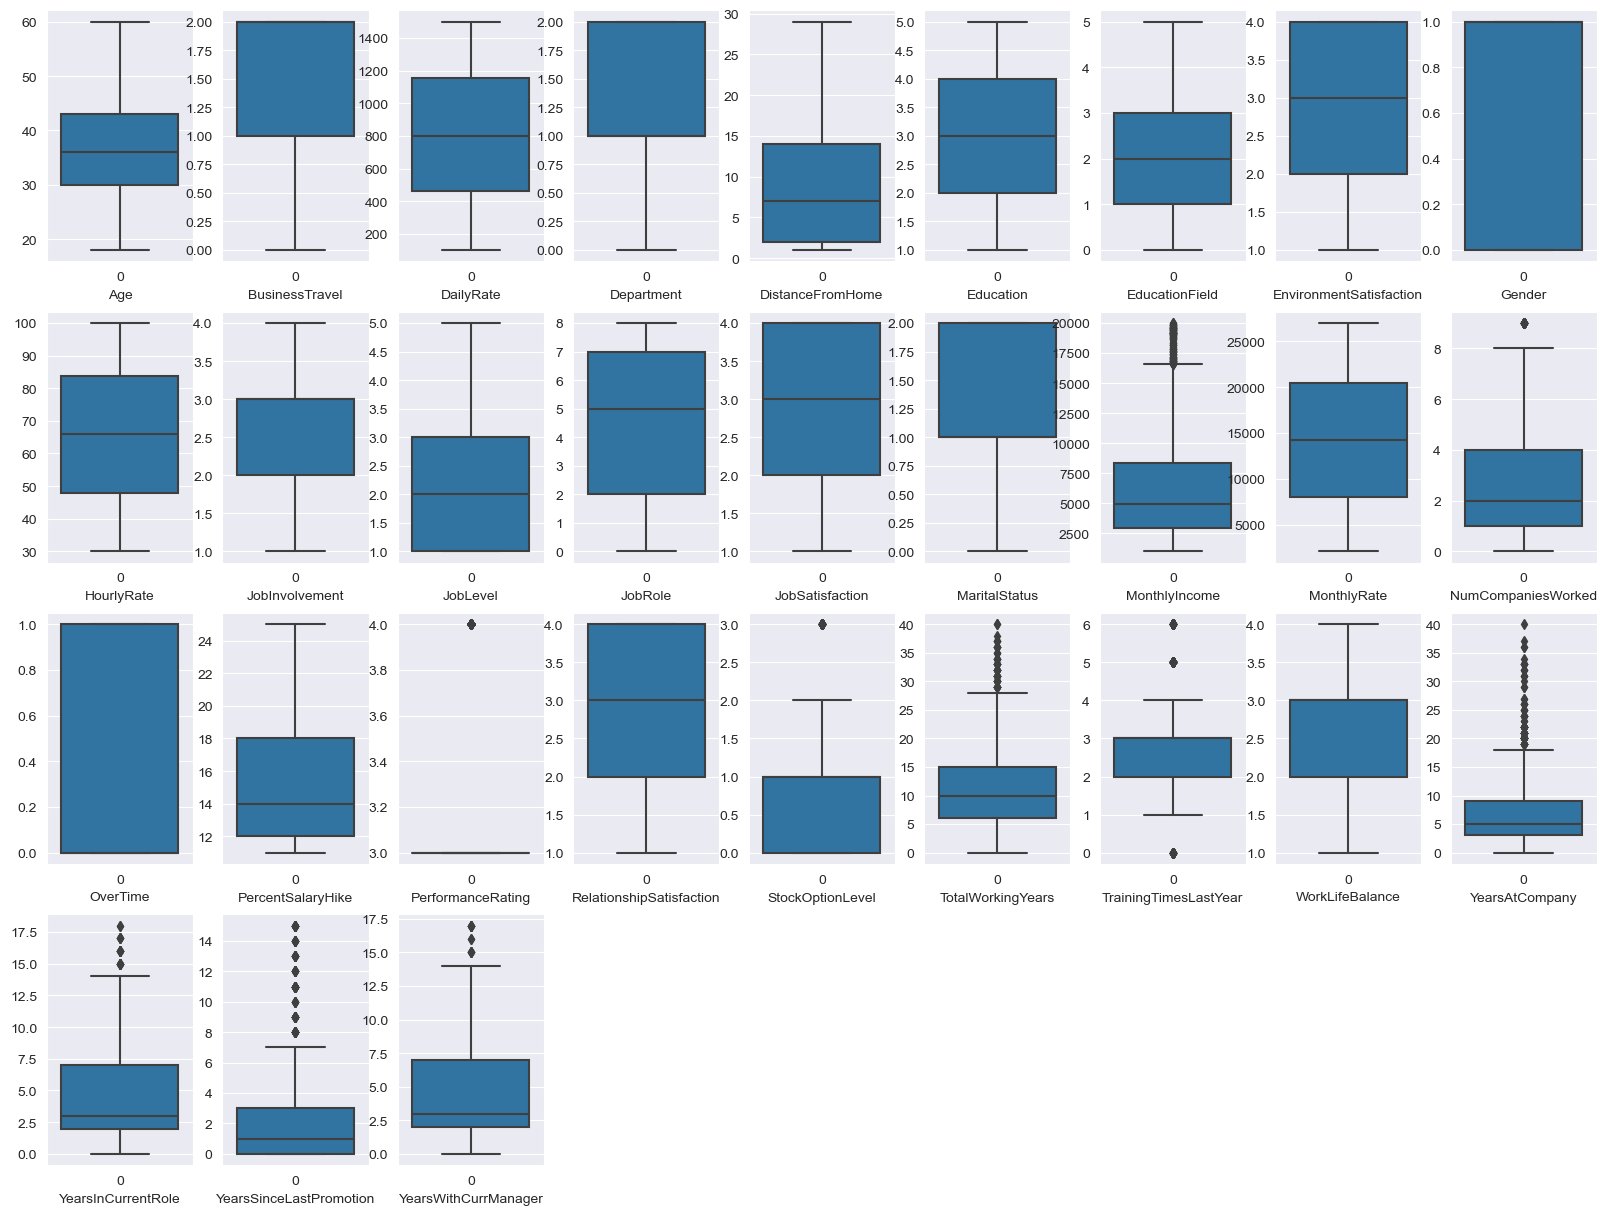

In [21]:
## tracking outliers from graph
plt.figure(figsize=(20,15))
num = 1
for i in df.drop("Attrition",axis=1):
    ax = plt.subplot(4,9,num)
    sns.boxplot(df[i])
    plt.xlabel(i)
    num +=1
plt.show()

* **Removing Outliers**

In [22]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,2.280906,0.590048,0.742527,1.401512,1.010909,0.891688,0.937414,0.660531,1.224745,...,0.426230,1.584178,0.932014,0.421642,2.171982,2.493820,0.164613,0.063296,0.679146,0.245834
1,1.322365,0.438422,0.913194,1.297775,0.493817,0.147150,1.868426,0.937414,0.254625,0.816497,...,2.346151,1.191438,0.241988,0.164511,0.155707,0.338096,0.488508,0.764998,0.368715,0.806541
2,0.008343,2.280906,0.590048,1.414363,0.493817,0.887515,0.891688,1.316673,1.169781,0.816497,...,0.426230,0.658973,0.932014,0.550208,0.155707,0.338096,1.144294,1.167687,0.679146,1.155935


In [23]:
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
        29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
        27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
        24

In [24]:
print(z.iloc[28,30],",",z.iloc[45,29])

3.6100788863016295 , 3.977310265498893


In [25]:
df.shape

(1470, 31)

In [26]:
np.where(z<3)

(array([   0,    0,    0, ..., 1469, 1469, 1469], dtype=int64),
 array([ 0,  1,  2, ..., 28, 29, 30], dtype=int64))

In [27]:
df = df[(z<3).all(axis=1)]
df.shape

(1387, 31)

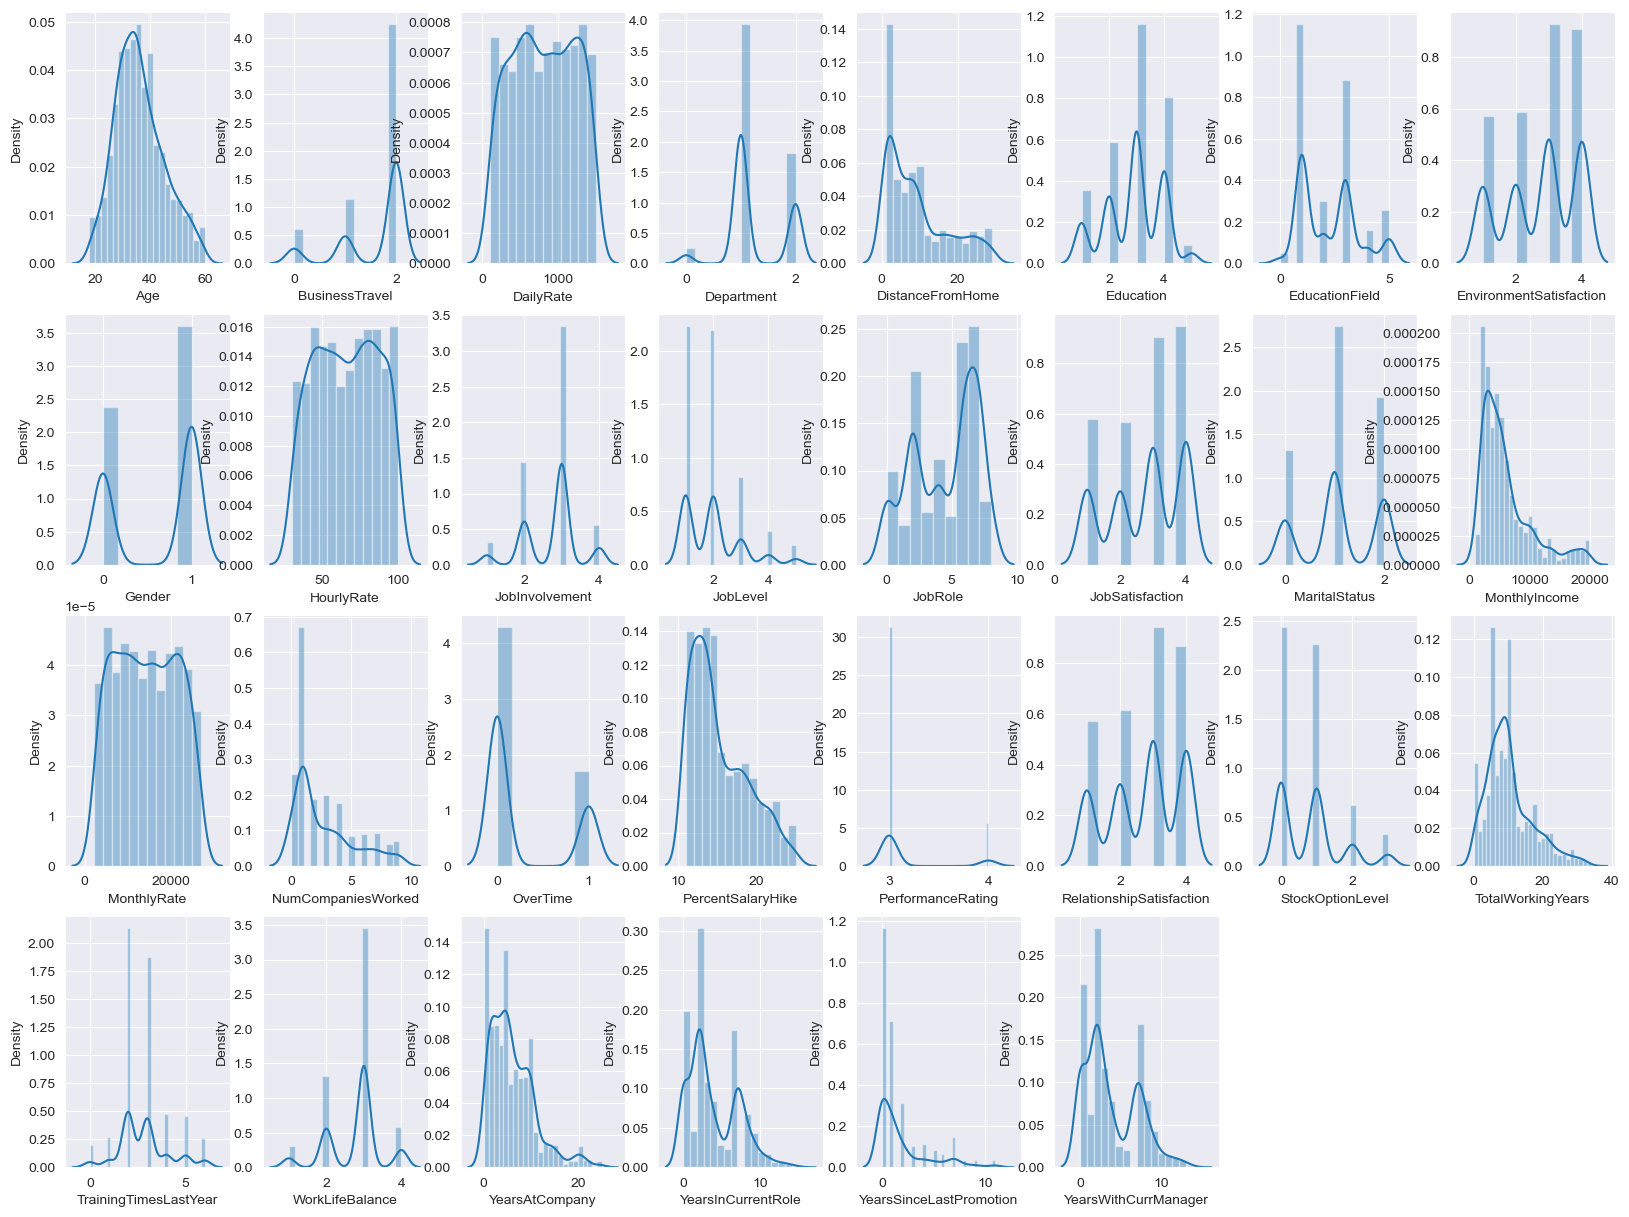

In [28]:
## Checking skewness
plt.figure(figsize=(20,15))
num = 1
for i in df.drop("Attrition",axis=1):
    ax = plt.subplot(4,8,num)
    sns.distplot(df[i])
    plt.xlabel(i)
    num +=1
plt.show()

* Removing Skewness

In [29]:
Col = ['DistanceFromHome','MonthlyIncome','PercentSalaryHike','YearsAtCompany']
for i in col:
    df[i] = np.sqrt(df[i])
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,1.414214,1102,1.414214,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0.0,1.000000,279,1.000000,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1.0,1.414214,1373,1.000000,2,2,2.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0


In [30]:
df["Attrition"] = df["Attrition"].astype(int)

<Axes: >

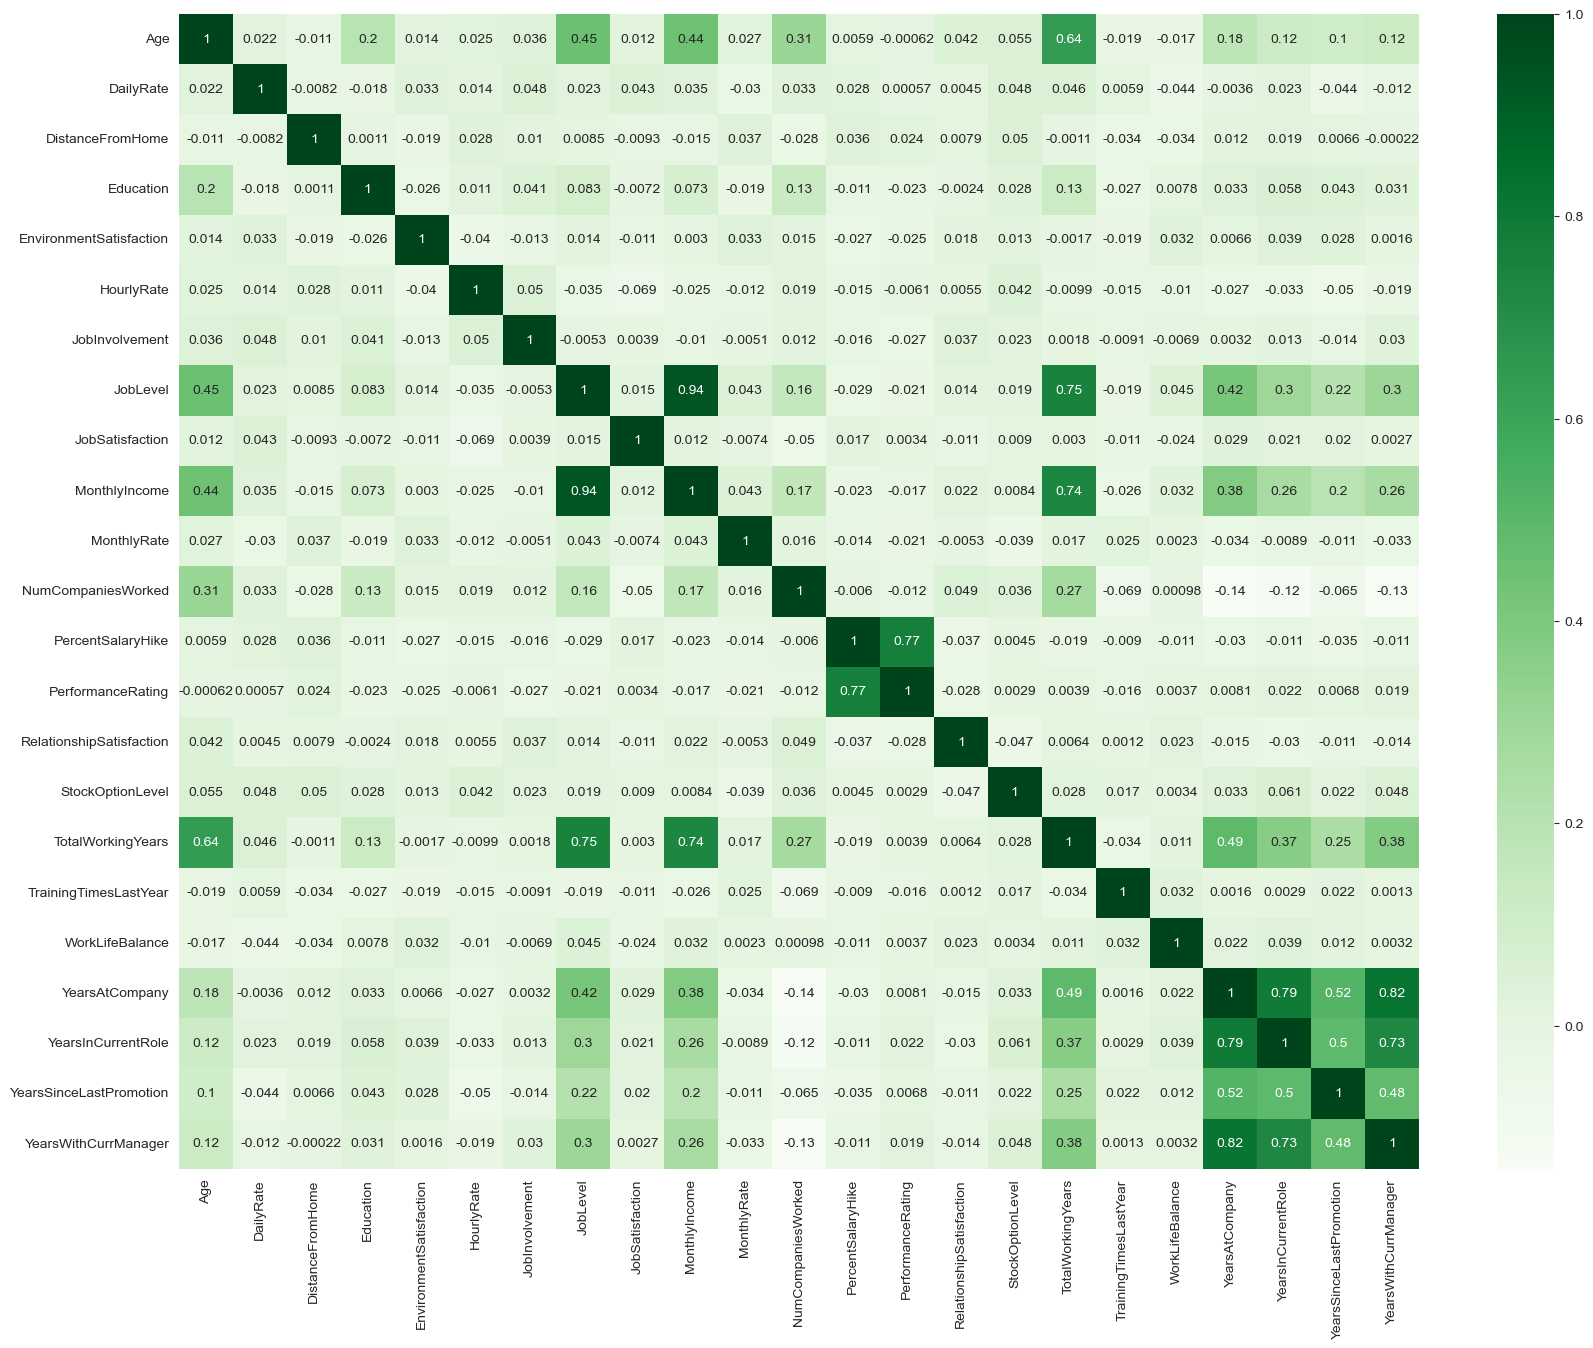

In [31]:
plt.figure(figsize=(20,15))
sns.heatmap(df.drop(col,axis=1).corr(),annot=True,cmap="Greens")

* YearAtCompany is highly correleted with YearsWithCurrManager and YearInCurrentRole
* TotalWorkingYears is highly correleted with JobLevel and MonthlyIncome
* JobLevel is Strong correletion with MonthlyIncome
* PercentSalaryHike and PerfomanceRating are coreleted with each other

In [32]:
# spliting input and target variable

x = df.drop("Attrition",axis=1)
x.head(3)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.414214,1102,1.414214,1,2,1.0,2,0.0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1.000000,279,1.000000,8,1,1.0,3,1.0,61,...,4,4,1,10,3,3,10,7,1,7
2,37,1.414214,1373,1.000000,2,2,2.0,4,1.0,92,...,3,2,0,7,3,3,0,0,0,0


In [33]:
y = df.iloc[:,1]
y.head(3)

0    1
1    0
2    1
Name: Attrition, dtype: int32

#### Feature selection
* Using variance inflation factor

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(x):
    vif = pd.DataFrame()
    vif["ver"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [35]:
vif(x)

,ver,VIF
0,Age,30.993761
1,BusinessTravel,8.364971
2,DailyRate,5.050228
3,Department,21.572923
4,DistanceFromHome,2.322724
5,Education,9.330794
6,EducationField,10.581684
7,EnvironmentSatisfaction,7.196411
8,Gender,2.531054
9,HourlyRate,11.363066


* Here PerformanceRating,JobLevel has highest vif we have to drop it

In [36]:
x.drop(["PerformanceRating","JobLevel","Age","Department"],axis=1,inplace=True)
vif(x)

,ver,VIF
0,BusinessTravel,8.146155
1,DailyRate,5.021531
2,DistanceFromHome,2.303127
3,Education,8.848504
4,EducationField,9.925432
5,EnvironmentSatisfaction,7.024217
6,Gender,2.515862
7,HourlyRate,10.818345
8,JobInvolvement,14.713444
9,JobRole,6.990500


In [37]:
x.drop(["PercentSalaryHike","WorkLifeBalance","JobInvolvement","YearsAtCompany","HourlyRate"],axis=1,inplace=True)
vif(x)

,ver,VIF
0,BusinessTravel,7.742318
1,DailyRate,4.880648
2,DistanceFromHome,2.272351
3,Education,8.369253
4,EducationField,9.435285
5,EnvironmentSatisfaction,6.826040
6,Gender,2.469811
7,JobRole,6.765416
8,JobSatisfaction,6.688503
9,MaritalStatus,5.860136


In [38]:
x.head()

,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,MaritalStatus,...,MonthlyRate,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1.414214,1102,1,2,1.000000,2,0.0,2.645751,4,1.414214,...,19479,8,1.0,1,0,8,0,4,0,5
1,1.000000,279,8,1,1.000000,3,1.0,2.449490,2,1.000000,...,24907,1,0.0,4,1,10,3,7,1,7
2,1.414214,1373,2,2,2.000000,4,1.0,1.414214,3,1.414214,...,2396,6,1.0,2,0,7,3,0,0,0
3,1.000000,1392,3,4,1.000000,4,0.0,2.449490,3,1.000000,...,23159,1,1.0,3,0,8,3,7,3,0
4,1.414214,591,2,1,1.732051,1,1.0,1.414214,2,1.000000,...,16632,9,0.0,4,1,6,3,2,2,2


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=42)

In [41]:
print('x_train:',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train: (929, 21)
x_test (458, 21)
y_train (929,)
y_test (458,)


In [42]:
y_train.value_counts()

0    785
1    144
Name: Attrition, dtype: int64

* Handling imbalance data

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
smt = SMOTE()
x_train,y_train = smt.fit_resample(x_train,y_train)

In [45]:
print('x_train:',x_train.shape)
print('y_train',y_train.shape)
print(y_train.value_counts())

x_train: (1570, 21)
y_train (1570,)
0    785
1    785
Name: Attrition, dtype: int64


### Model Bulding

#### LogisticRegression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

In [47]:
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [48]:
y_train_pred = lg.predict(x_train)
y_test_pred = lg.predict(x_test)

In [49]:
## train data accuracy

print("<-------------------train data------------------------------>")
print("accuracy_score:",accuracy_score(y_train,y_train_pred),"\n")
print("confusion_matrix\n",confusion_matrix(y_train,y_train_pred))
print("\n classification_report\n",classification_report(y_train,y_train_pred))

## test data accuracy
print("<-------------------test data------------------------------>")
print("accuracy_score:",accuracy_score(y_test,y_test_pred),"\n")
print("confusion_matrix\n",confusion_matrix(y_test,y_test_pred))
print("\n classification_report\n",classification_report(y_test,y_test_pred))


y_pred_prob = lg.predict_proba(x_test)[:,1] 
print('roc_auc score:',roc_auc_score(y_test, y_pred_prob) )

<-------------------train data------------------------------>
accuracy_score: 0.7859872611464969 

confusion_matrix
 [[648 137]
 [199 586]]

 classification_report
               precision    recall  f1-score   support

           0       0.77      0.83      0.79       785
           1       0.81      0.75      0.78       785

    accuracy                           0.79      1570
   macro avg       0.79      0.79      0.79      1570
weighted avg       0.79      0.79      0.79      1570

<-------------------test data------------------------------>
accuracy_score: 0.7139737991266376 

confusion_matrix
 [[289  84]
 [ 47  38]]

 classification_report
               precision    recall  f1-score   support

           0       0.86      0.77      0.82       373
           1       0.31      0.45      0.37        85

    accuracy                           0.71       458
   macro avg       0.59      0.61      0.59       458
weighted avg       0.76      0.71      0.73       458

roc_auc score: 0.

#### RandomForestClassifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
y_train_pred = rfc.predict(x_train)
y_test_pred = rfc.predict(x_test)

In [53]:
## train data accuracy

print("<-------------------train data------------------------------>")
print("accuracy_score:",accuracy_score(y_train,y_train_pred),"\n")
print("confusion_matrix\n",confusion_matrix(y_train,y_train_pred))
print("\n classification_report\n",classification_report(y_train,y_train_pred))

## test data accuracy
print("<-------------------test data------------------------------>")
print("accuracy_score:",accuracy_score(y_test,y_test_pred),"\n")
print("confusion_matrix\n",confusion_matrix(y_test,y_test_pred))
print("\n classification_report\n",classification_report(y_test,y_test_pred))


y_pred_prob = rfc.predict_proba(x_test)[:,1] 
print('roc_auc score:',roc_auc_score(y_test, y_pred_prob) )

<-------------------train data------------------------------>
accuracy_score: 1.0 

confusion_matrix
 [[785   0]
 [  0 785]]

 classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       785
           1       1.00      1.00      1.00       785

    accuracy                           1.00      1570
   macro avg       1.00      1.00      1.00      1570
weighted avg       1.00      1.00      1.00      1570

<-------------------test data------------------------------>
accuracy_score: 0.8384279475982532 

confusion_matrix
 [[359  14]
 [ 60  25]]

 classification_report
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       373
           1       0.64      0.29      0.40        85

    accuracy                           0.84       458
   macro avg       0.75      0.63      0.65       458
weighted avg       0.82      0.84      0.81       458

roc_auc score: 0.790190821636965

#### AdaBoostClassifier

In [54]:
from sklearn.ensemble import AdaBoostClassifier

In [55]:
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [56]:
y_train_pred = ada.predict(x_train)
y_test_pred = ada.predict(x_test)

In [57]:
## train data accuracy

print("<-------------------train data------------------------------>")
print("accuracy_score:",accuracy_score(y_train,y_train_pred),"\n")
print("confusion_matrix\n",confusion_matrix(y_train,y_train_pred))
print("\n classification_report\n",classification_report(y_train,y_train_pred))

## test data accuracy
print("<-------------------test data------------------------------>")
print("accuracy_score:",accuracy_score(y_test,y_test_pred),"\n")
print("confusion_matrix\n",confusion_matrix(y_test,y_test_pred))
print("\n classification_report\n",classification_report(y_test,y_test_pred))


y_pred_prob = ada.predict_proba(x_test)[:,1] 
print('roc_auc score:',roc_auc_score(y_test, y_pred_prob) )

<-------------------train data------------------------------>
accuracy_score: 0.9248407643312102 

confusion_matrix
 [[729  56]
 [ 62 723]]

 classification_report
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       785
           1       0.93      0.92      0.92       785

    accuracy                           0.92      1570
   macro avg       0.92      0.92      0.92      1570
weighted avg       0.92      0.92      0.92      1570

<-------------------test data------------------------------>
accuracy_score: 0.8384279475982532 

confusion_matrix
 [[337  36]
 [ 38  47]]

 classification_report
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       373
           1       0.57      0.55      0.56        85

    accuracy                           0.84       458
   macro avg       0.73      0.73      0.73       458
weighted avg       0.84      0.84      0.84       458

roc_auc score: 0.

#### GradientBoostingClassifier

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
gbc= GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [60]:
y_train_pred = gbc.predict(x_train)
y_test_pred = gbc.predict(x_test)

In [93]:
## train data accuracy

print("<-------------------train data------------------------------>")
print("accuracy_score:",accuracy_score(y_train,y_train_pred),"\n")
print("confusion_matrix\n",confusion_matrix(y_train,y_train_pred))
print("\n classification_report\n",classification_report(y_train,y_train_pred))

## test data accuracy
print("<-------------------test data------------------------------>")
print("accuracy_score:",accuracy_score(y_test,y_test_pred),"\n")
print("confusion_matrix\n",confusion_matrix(y_test,y_test_pred))
print("\n classification_report\n",classification_report(y_test,y_test_pred))


y_pred_prob = gbc.predict_proba(x_test)[:,1] 
print('roc_auc score:',roc_auc_score(y_test, y_pred_prob) )

<-------------------train data------------------------------>
accuracy_score: 0.9732484076433121 

confusion_matrix
 [[774  11]
 [ 31 754]]

 classification_report
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       785
           1       0.99      0.96      0.97       785

    accuracy                           0.97      1570
   macro avg       0.97      0.97      0.97      1570
weighted avg       0.97      0.97      0.97      1570

<-------------------test data------------------------------>
accuracy_score: 0.8427947598253275 

confusion_matrix
 [[353  20]
 [ 52  33]]

 classification_report
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       373
           1       0.62      0.39      0.48        85

    accuracy                           0.84       458
   macro avg       0.75      0.67      0.69       458
weighted avg       0.83      0.84      0.83       458

roc_auc score: 0.

#### XGbosst

In [62]:
from xgboost import XGBClassifier

In [63]:
xg = XGBClassifier()
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [64]:
y_train_pred = xg.predict(x_train)
y_test_pred = xg.predict(x_test)

In [65]:
## train data accuracy

print("<-------------------train data------------------------------>")
print("accuracy_score:",accuracy_score(y_train,y_train_pred),"\n")
print("confusion_matrix\n",confusion_matrix(y_train,y_train_pred))
print("\n classification_report\n",classification_report(y_train,y_train_pred))

## test data accuracy
print("<-------------------test data------------------------------>")
print("accuracy_score:",accuracy_score(y_test,y_test_pred),"\n")
print("confusion_matrix\n",confusion_matrix(y_test,y_test_pred))
print("\n classification_report\n",classification_report(y_test,y_test_pred))


y_pred_prob = xg.predict_proba(x_test)[:,1] 
print('roc_auc score:',roc_auc_score(y_test, y_pred_prob) )

<-------------------train data------------------------------>
accuracy_score: 1.0 

confusion_matrix
 [[785   0]
 [  0 785]]

 classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       785
           1       1.00      1.00      1.00       785

    accuracy                           1.00      1570
   macro avg       1.00      1.00      1.00      1570
weighted avg       1.00      1.00      1.00      1570

<-------------------test data------------------------------>
accuracy_score: 0.8318777292576419 

confusion_matrix
 [[349  24]
 [ 53  32]]

 classification_report
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       373
           1       0.57      0.38      0.45        85

    accuracy                           0.83       458
   macro avg       0.72      0.66      0.68       458
weighted avg       0.81      0.83      0.82       458

roc_auc score: 0.796152026494243

#### Knn

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [68]:
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

In [69]:
## train data accuracy

print("<-------------------train data------------------------------>")
print("accuracy_score:",accuracy_score(y_train,y_train_pred),"\n")
print("confusion_matrix\n",confusion_matrix(y_train,y_train_pred))
print("\n classification_report\n",classification_report(y_train,y_train_pred))

## test data accuracy
print("<-------------------test data------------------------------>")
print("accuracy_score:",accuracy_score(y_test,y_test_pred),"\n")
print("confusion_matrix\n",confusion_matrix(y_test,y_test_pred))
print("\n classification_report\n",classification_report(y_test,y_test_pred))


y_pred_prob = knn.predict_proba(x_test)[:,1] 
print('roc_auc score:',roc_auc_score(y_test, y_pred_prob) )

<-------------------train data------------------------------>
accuracy_score: 0.8624203821656051 

confusion_matrix
 [[613 172]
 [ 44 741]]

 classification_report
               precision    recall  f1-score   support

           0       0.93      0.78      0.85       785
           1       0.81      0.94      0.87       785

    accuracy                           0.86      1570
   macro avg       0.87      0.86      0.86      1570
weighted avg       0.87      0.86      0.86      1570

<-------------------test data------------------------------>
accuracy_score: 0.6331877729257642 

confusion_matrix
 [[253 120]
 [ 48  37]]

 classification_report
               precision    recall  f1-score   support

           0       0.84      0.68      0.75       373
           1       0.24      0.44      0.31        85

    accuracy                           0.63       458
   macro avg       0.54      0.56      0.53       458
weighted avg       0.73      0.63      0.67       458

roc_auc score: 0.

#### SVR

In [70]:
from sklearn.svm import SVC

In [71]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [72]:
y_train_pred = svc.predict(x_train)
y_test_pred = svc.predict(x_test)

In [73]:
## train data accuracy

print("<-------------------train data------------------------------>")
print("accuracy_score:",accuracy_score(y_train,y_train_pred),"\n")
print("confusion_matrix\n",confusion_matrix(y_train,y_train_pred))
print("\n classification_report\n",classification_report(y_train,y_train_pred))

## test data accuracy
print("<-------------------test data------------------------------>")
print("accuracy_score:",accuracy_score(y_test,y_test_pred),"\n")
print("confusion_matrix\n",confusion_matrix(y_test,y_test_pred))
print("\n classification_report\n",classification_report(y_test,y_test_pred))

<-------------------train data------------------------------>
accuracy_score: 0.6261146496815286 

confusion_matrix
 [[379 406]
 [181 604]]

 classification_report
               precision    recall  f1-score   support

           0       0.68      0.48      0.56       785
           1       0.60      0.77      0.67       785

    accuracy                           0.63      1570
   macro avg       0.64      0.63      0.62      1570
weighted avg       0.64      0.63      0.62      1570

<-------------------test data------------------------------>
accuracy_score: 0.49563318777292575 

confusion_matrix
 [[172 201]
 [ 30  55]]

 classification_report
               precision    recall  f1-score   support

           0       0.85      0.46      0.60       373
           1       0.21      0.65      0.32        85

    accuracy                           0.50       458
   macro avg       0.53      0.55      0.46       458
weighted avg       0.73      0.50      0.55       458



* **From above GradientBoostingClassifier is best tarin and test acc.** 
##### From auc roc score and accuracy of train and test and also from confusion_matrix AdaBoost is best model for our dataset

### Final model

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
param = {
    "n_estimators" : [100,300,500],
    "learning_rate" : [0.1,1,10,100],
    "algorithm" : ['SAMME', 'SAMME.R'],
    "random_state" : [39,40,42,44]
}

In [103]:
ada_cv = GridSearchCV(estimator=ada,param_grid=param,cv=5,verbose=1)
ada_cv.fit(x_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 1, 10, 100],
                         'n_estimators': [100, 300, 500],
                         'random_state': [39, 40, 42, 44]},
             verbose=1)

In [104]:
ada_cv.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.1,
 'n_estimators': 500,
 'random_state': 39}

In [105]:
y_train_pred = ada_cv.predict(x_train)
y_test_pred = ada_cv.predict(x_test)

In [106]:
## train data accuracy

print("<-------------------train data------------------------------>")
print("accuracy_score:",accuracy_score(y_train,y_train_pred),"\n")
print("confusion_matrix\n",confusion_matrix(y_train,y_train_pred))
print("\n classification_report\n",classification_report(y_train,y_train_pred))

## test data accuracy
print("<-------------------test data------------------------------>")
print("accuracy_score:",accuracy_score(y_test,y_test_pred),"\n")
print("confusion_matrix\n",confusion_matrix(y_test,y_test_pred))
print("\n classification_report\n",classification_report(y_test,y_test_pred))

y_pred_prob = ada_cv.predict_proba(x_test)[:,1] 
print('roc_auc score:',roc_auc_score(y_test, y_pred_prob) )

<-------------------train data------------------------------>
accuracy_score: 0.9318471337579618 

confusion_matrix
 [[744  41]
 [ 66 719]]

 classification_report
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       785
           1       0.95      0.92      0.93       785

    accuracy                           0.93      1570
   macro avg       0.93      0.93      0.93      1570
weighted avg       0.93      0.93      0.93      1570

<-------------------test data------------------------------>
accuracy_score: 0.8449781659388647 

confusion_matrix
 [[344  29]
 [ 42  43]]

 classification_report
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       373
           1       0.60      0.51      0.55        85

    accuracy                           0.84       458
   macro avg       0.74      0.71      0.73       458
weighted avg       0.84      0.84      0.84       458

roc_auc score: 0.

In [108]:
import joblib

In [109]:
joblib.dump(ada_cv,"HR_Model.obj")

['HR_Model.obj']

In [110]:
Hr_model = joblib.load("HR_Model.obj")

prediction

In [97]:
input_value = x.sample(10)
input_value

,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,MaritalStatus,...,MonthlyRate,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
908,1.414214,536,10,5,1.414214,4,1.0,2.645751,3,0.000000,...,21708,0,1.0,4,2,10,3,8,0,8
372,1.414214,755,9,4,1.000000,3,1.0,0.000000,2,1.414214,...,19394,9,0.0,3,0,10,5,1,0,0
852,1.414214,1401,6,1,1.732051,2,0.0,1.414214,4,1.000000,...,26342,1,0.0,1,1,10,5,8,0,8
925,1.414214,603,7,4,1.732051,2,0.0,2.449490,2,1.000000,...,5628,6,1.0,4,0,18,2,0,0,0
1206,0.000000,786,7,3,1.732051,4,1.0,1.414214,4,1.414214,...,11925,1,0.0,3,0,7,5,7,5,7
14,1.414214,103,24,3,1.000000,3,1.0,1.414214,3,1.414214,...,12947,5,1.0,2,0,6,4,2,0,3
76,1.414214,776,1,4,1.414214,3,1.0,2.645751,1,1.414214,...,23016,0,0.0,2,0,16,2,13,2,8
355,1.414214,933,1,3,1.000000,3,1.0,2.645751,3,1.000000,...,20156,1,0.0,2,1,8,3,7,7,7
1154,1.414214,1176,26,4,1.000000,4,0.0,1.732051,3,1.000000,...,5220,3,0.0,3,1,27,2,2,1,0
344,1.414214,1296,5,4,2.236068,3,1.0,2.000000,2,1.414214,...,18264,0,0.0,4,0,17,5,6,0,13


In [98]:
target = []
ind = [908,372,852,925,1206,14,76,355,1154,344]
for i in ind:
    target.append(y.iloc[i])
target

[0, 0, 0, 0, 1, 1, 0, 0, 0, 0]

In [111]:
Hr_model.predict(input_value)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0])